In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston

In [2]:
df= pd.read_csv("student_scores.csv")

In [3]:
print("Head of the data:")
display(df.head())
print("\n\nTail of the data:")
display(df.tail())

Head of the data:


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30




Tail of the data:


,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [4]:
print("Number of Raws in the dataset:-",df.shape[0])
print("Number of Columns in the dataset:-",df.shape[1])

Number of Raws in the dataset:- 25
Number of Columns in the dataset:- 2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
print("Descriptive Statistics of Data::-")
round(df.describe(),2)

Descriptive Statistics of Data::-


,Hours,Scores
count,25.00,25.00
mean,5.01,51.48
std,2.53,25.29
min,1.10,17.00
25%,2.70,30.00
50%,4.80,47.00
75%,7.40,75.00
max,9.20,95.00


In [7]:
print("Number of Duplicates in the data",df.duplicated().sum())

Number of Duplicates in the data 0


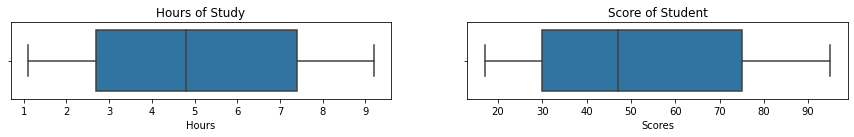

In [8]:
plt.figure(figsize=(15,25))
plt.subplot(15,2,1)
sns.boxplot(data=df, x="Hours")
plt.title("Hours of Study")
plt.subplot(15,2,2)
sns.boxplot(data=df, x="Scores")
plt.title("Score of Student");

**No Outliers present in the Data.**

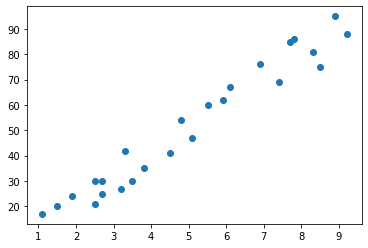

In [9]:
plt.scatter(x = df["Hours"], y=df["Scores"]);

## Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [11]:
x = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=123)

In [13]:
lr = LinearRegression()

In [14]:
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
line = lr.coef_*x+lr.intercept_

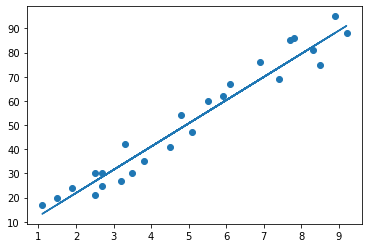

In [16]:
# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

In [17]:
X_test

array([[1.5],
       [4.8],
       [3.8],
       [6.1],
       [8.9]])

In [18]:
y_test_pred= lr.predict(X_test)

In [19]:
predictions = pd.DataFrame({"Actual":y_test, "Predictions":y_test_pred})
predictions

,Actual,Predictions
0,20,17.097967
1,54,48.783639
2,35,39.181920
3,67,61.265873
4,95,88.150686


In [20]:
hours =np.array([[9.25]])

In [21]:
# You can also test with your own data
own_pred = lr.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(round(own_pred[0],2)))

No of Hours = [[9.25]]
Predicted Score = 91.51


In [22]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_test_pred)) 

Mean Absolute Error: 4.976750923680403


In [23]:
np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

5.15585070467339

## OLS Model

In [24]:
import statsmodels.api as sm

In [25]:
X_con_train=sm.add_constant(X_train)
X_con_test=sm.add_constant(X_test)

In [26]:
model = sm.OLS(y_train, X_con_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     337.2
Date:                Mon, 18 Sep 2023   Prob (F-statistic):           4.18e-13
Time:                        09:14:32   Log-Likelihood:                -62.469
No. Observations:                  20   AIC:                             128.9
Df Residuals:                      18   BIC:                             130.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6954      2.923      0.922      0.3

In [27]:
print("Score of a student who studies 9.25 hours is",round(2.6954+9.25*9.6017,2))

Score of a student who studies 9.25 hours is 91.51
